In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
from pathlib import Path
from omegaconf import OmegaConf
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

from cohlib.utils import  pickle_open

In [3]:
def plot_synthetic_data2(ax, obs, gamma, xs, zs, lams, trial, trial_color):
    title_size = 12
    label_size = 10
    x = jnp.arange(0, 1000) / 1000
    # for i in range(start,start+3):
    l = trial
    # i = 3
        
    ax[0].plot(x, lams[:,0,l], color=trial_color)
    ax[0].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[0].margins(0)
    ax[0].set_ylabel('Intensity', size = label_size)

    ax[2].plot(x, lams[:,1,l], color=trial_color)
    ax[2].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[2].margins(0)
    ax[2].set_ylabel('Intensity', size = label_size)

    ax[1].plot(x, obs[:,0,l], color=trial_color)
    ax[1].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[1].margins(0)
    ax[1].set_ylabel('Intensity', size = label_size)

    ax[3].plot(x, obs[:,1,l], color=trial_color)
    ax[3].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[3].margins(0)
    ax[3].set_ylabel('Intensity', size = label_size)


    ax[3].set_xlabel('Time (sec)', size = label_size)
    # plt.xlim([0,sample_length/fs])


In [4]:
def plot_synthetic_data(ax, obs, gamma, xs, zs, lams, trial, trial_color):
    title_size = 12
    label_size = 10
    x = jnp.arange(0, 1000) / 1000
    # for i in range(start,start+3):
    l = trial
    # i = 3
        
    ax[0].plot(x, lams[:,0,l], color=trial_color)
    ax[0].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[0].margins(0)
    ax[0].set_ylabel('Intensity', size = label_size)

    ax[2].plot(x, lams[:,1,l], color=trial_color)
    ax[2].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[2].margins(0)
    ax[2].set_ylabel('Intensity', size = label_size)

    ax[4].plot(x, lams[:,2,l], color=trial_color)
    ax[4].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[4].margins(0)
    ax[4].set_ylabel('Intensity', size = label_size)

    ax[1].plot(x, obs[:,0,l], color=trial_color)
    ax[1].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[1].margins(0)
    ax[1].set_ylabel('Intensity', size = label_size)

    ax[3].plot(x, obs[:,1,l], color=trial_color)
    ax[3].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[3].margins(0)
    ax[3].set_ylabel('Intensity', size = label_size)

    ax[5].plot(x, obs[:,2,l], color=trial_color)
    ax[5].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
    ax[5].margins(0)
    ax[5].set_ylabel('Intensity', size = label_size)


    ax[5].set_xlabel('Time (sec)', size = label_size)
    # plt.xlim([0,sample_length/fs])


In [5]:
def check_attrs(cfg, lcfg_attrs, mcfg_attrs, ocfg_attrs):    
    lcfg_check = [cfg.latent.get(k, None) == v for k, v in lcfg_attrs.items()]
    mcfg_check = [cfg.model.get(k, None) == v for k, v in mcfg_attrs.items()]
    ocfg_check = [cfg.obs.get(k, None) == v for k, v in ocfg_attrs.items()]

    check = jnp.all(jnp.array(lcfg_check + mcfg_check + ocfg_check))
    return check

def filter_load_results(paths, lcfg_attrs, mcfg_attrs, ocfg_attrs):
    sel_paths = []
    for path in paths:
        _dir = Path(path)
        for i, exp in enumerate(_dir.glob('*')):
            cfg_path = os.path.join(exp, '.hydra/config.yaml')
            cfg = OmegaConf.load(cfg_path)

            if check_attrs(cfg, lcfg_attrs, mcfg_attrs, ocfg_attrs):
                sel_paths.append(exp)

    assert len(sel_paths) > 0
    print(f'{len(sel_paths)} paths found meeting critera')

    results = []
    for path in sel_paths:
        cfg_path = os.path.join(path, '.hydra/config.yaml')
        cfg = OmegaConf.load(cfg_path)

        res = pickle_open(os.path.join(path, 'res.pickle'))
        res['cfg'] = cfg
        results.append(res)

    return results


def filter_loaded(loaded, lcfg_attrs, mcfg_attrs, ocfg_attrs):
    filtered = [r for r in loaded if check_attrs(r['cfg'], lcfg_attrs, mcfg_attrs, ocfg_attrs)]
    if len(filtered) == 0:
        print("No results in list to filter.")
    elif len(filtered) == 1:
        print("Returned single result.")
        return filtered[0]
    else:
        print("Multiple results found.")
        return filtered

In [6]:
num_iters = 20

# 100000 10000000 1000000000
scale_init = 1000000000 
lcfg_attrs = {}

mcfg_attrs = {'emiters': num_iters,
              'scale_init': scale_init}

ocfg_attrs = {'obs_type': 'pp_relu'}

res_paths = ['/projectnb/stephenlab/jtauber/cohlib/hydra/refac_pprelu_obs/outputs/2024-11-10',
             '/projectnb/stephenlab/jtauber/cohlib/hydra/refac_pprelu_obs/outputs/2024-11-11']
# for res_path in res_paths:
#     clean_dir(res_path)

res_load_refac = filter_load_results(res_paths, lcfg_attrs, mcfg_attrs, ocfg_attrs)
Ls = sorted([r['cfg'].latent.L for r in res_load_refac])
alphas = sorted([r['cfg'].obs.alpha for r in res_load_refac])

alpha = 100
osel = {'alpha': alpha}
res_jax_refac = filter_loaded(res_load_refac, {}, {}, osel)
cfg = res_jax_refac['cfg']

4 paths found meeting critera
Returned single result.


In [7]:
from cohlib.jax.dists import sample_from_gamma, sample_obs
from cohlib.jax.observations import add0

ocfg = cfg.obs
lcfg = cfg.latent

In [8]:
def db_transform(S_x):
    return 10*jnp.log10(S_x + 1e-15)

def identity(S_x):
    return S_x

In [9]:
def cif_alpha_relu(alphas, xs):
    lams = alphas[None,:,None] + xs
    lams = lams.at[lams < 0].set(0)
    return lams
K = 3
J = 50
floor_val = 1e3
scale_target = 1e4
scale_gamma = 1e4
alphas = jnp.ones(K)*alpha

target_freq_ind = 9
A = jr.normal(jr.key(target_freq_ind), (K,K)) + jr.normal(jr.key(target_freq_ind+J), (K,K))*1j
G = A.T.conj() @ A
_, eig_vecs = jnp.linalg.eigh(G)

mod_vals = jnp.array([150, 60, 30])*scale_target
target_cross_spec = eig_vecs @ jnp.diag(mod_vals) @ eig_vecs.conj().T

gamma_nz = jnp.stack([jnp.eye(K, dtype=complex)*floor_val for j in range(J)])
gamma_nz = gamma_nz.at[target_freq_ind,:,:].set(target_cross_spec)

N = 500
nz = jnp.arange(50)
gamma = jnp.zeros((N,K,K), dtype=complex)
gamma = gamma.at[nz,:,:].set(gamma_nz)

gamma = gamma*scale_gamma

# gamma = gamma[:,:2,:2]
# alphas = alphas[:2]


lrk = jr.key(lcfg.seed)
zs = sample_from_gamma(lrk, gamma, lcfg.L)

zs_0dc = jnp.apply_along_axis(add0, 0, zs)
xs = jnp.fft.irfft(zs_0dc, axis=0)
lams = cif_alpha_relu(alphas, xs)


obs, obs_params = sample_obs(ocfg, xs)
obs_type = ocfg.obs_type

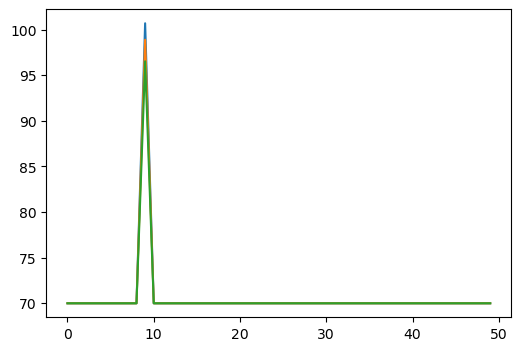

In [12]:
dB = True
if dB is True:
    transform = db_transform
else:
    transform = identity
    
fig, ax = plt.subplots(figsize=(6,4))
for k in range(K):
    ax.plot(transform(gamma[nz,k,k].real))


In [14]:
gamma[0,0,0]

Array(10000000.+0.j, dtype=complex64)

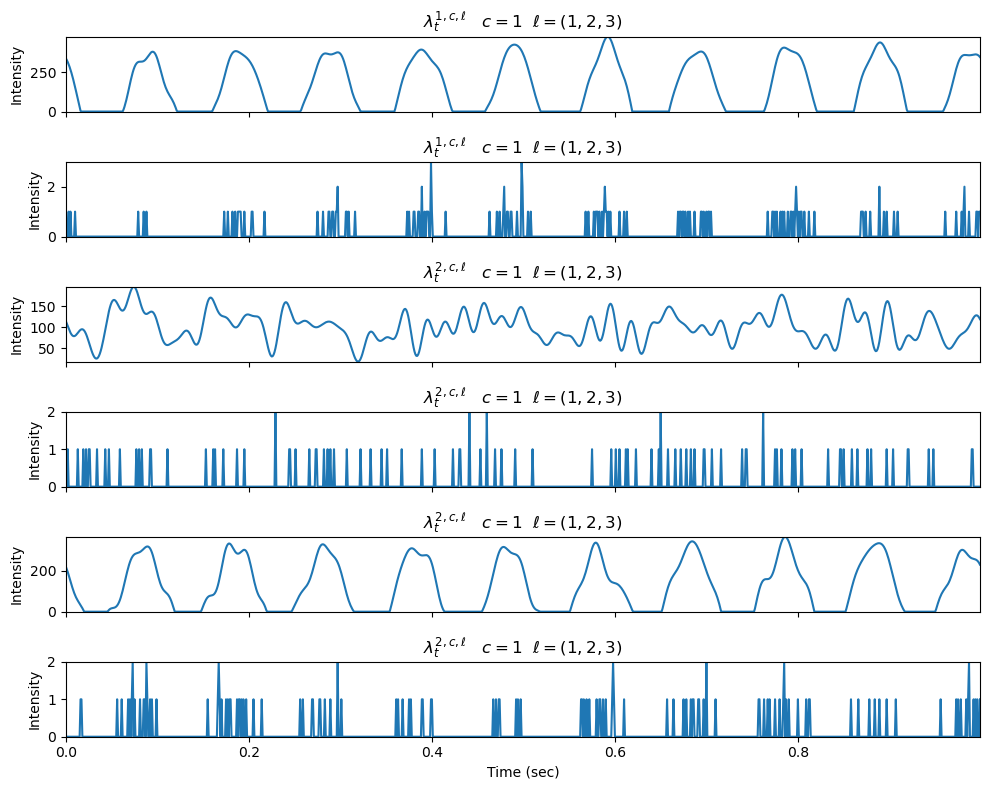

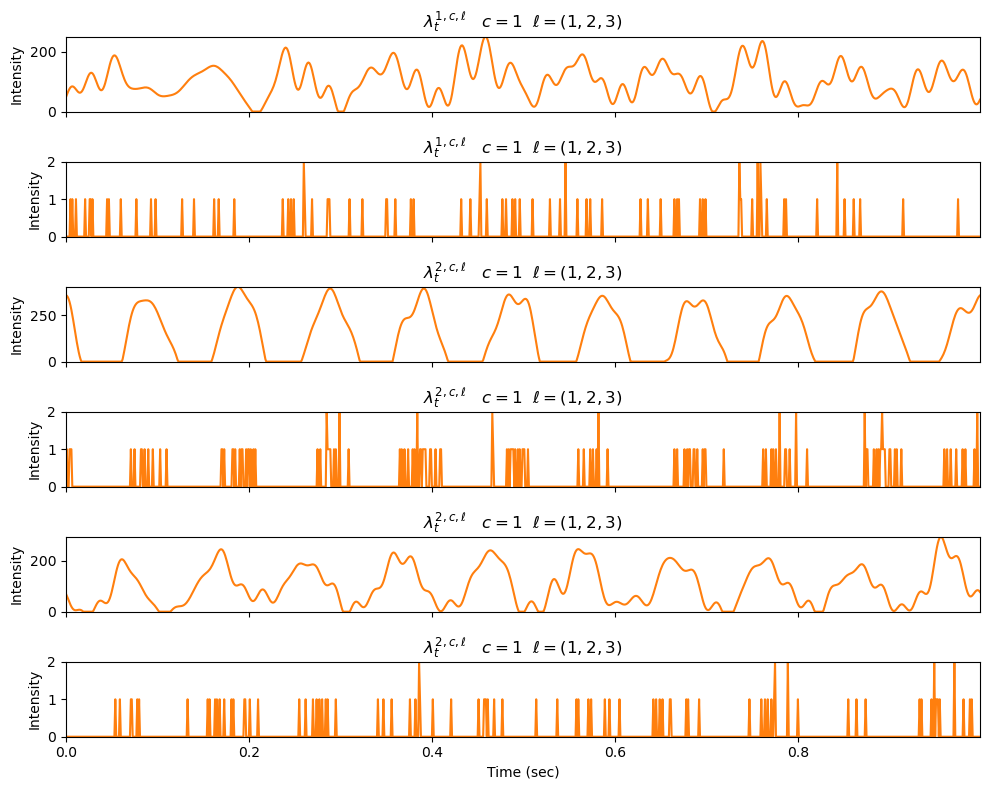

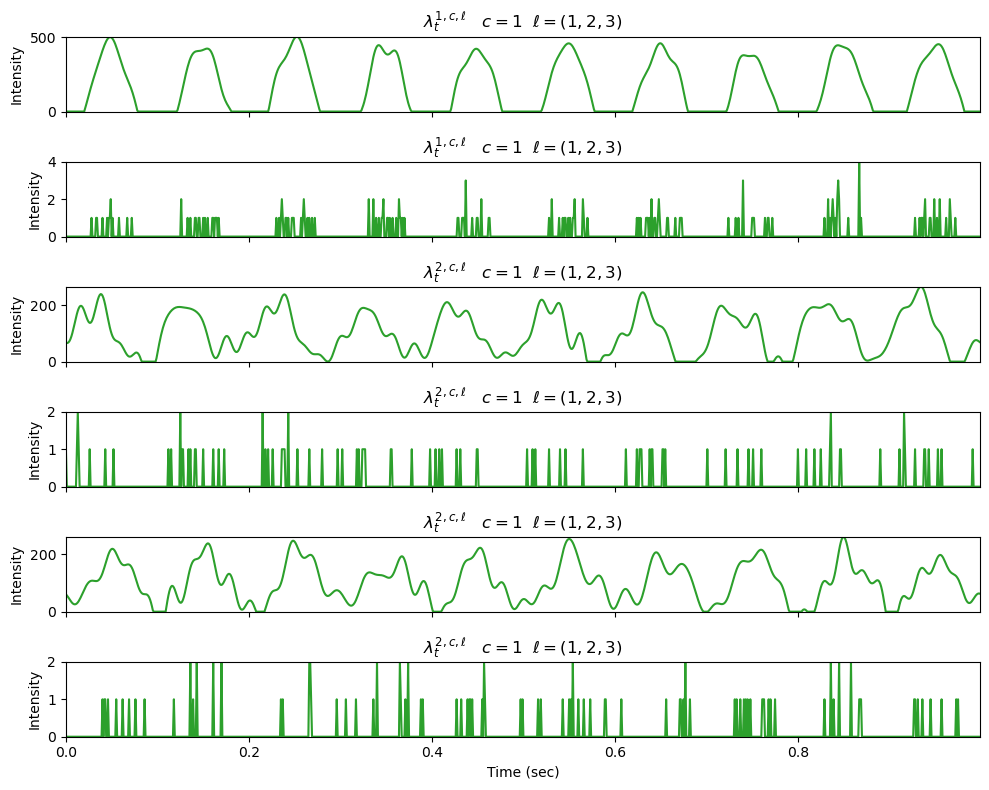

In [11]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
# freqs = jnp.arange(50)
# fig,ax = plt.subplots(6,1,figsize=(10,8), sharex=True)
for i in range(3):
    fig,ax = plt.subplots(6,1,figsize=(10,8), sharex=True)
    plot_synthetic_data(ax, obs, gamma, xs, zs, lams, trial=i, trial_color=colors[i])
    # fig,ax = plt.subplots(4,1,figsize=(10,8), sharex=True)
    # plot_synthetic_data2(ax, obs, gamma, xs, zs, lams, trial=i, trial_color=colors[i])
    plt.tight_layout()

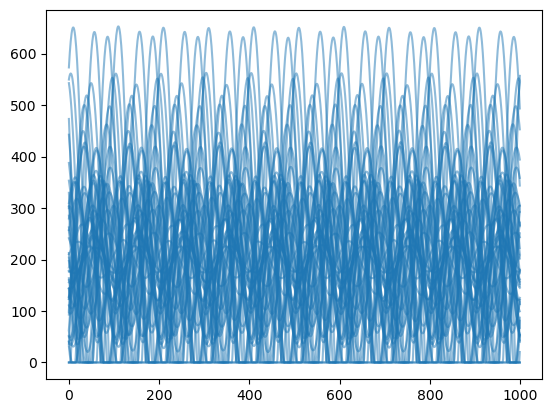

In [10]:
L = 50
k = 0
for l in range(L):
    plt.plot(lams[:,k,l], color='tab:blue', alpha=0.5)

In [15]:
gamma

Array([[[10000000.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j, 10000000.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j, 10000000.+0.j]],

       [[10000000.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j, 10000000.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j, 10000000.+0.j]],

       [[10000000.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j, 10000000.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j, 10000000.+0.j]],

       ...,

       [[       0.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j,        0.+0.j]],

       [[       0.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j,        0.+0.j]],

       [[       0.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j,        0.+0.j],
        [       0.+0.j,        0.+0.j,    

In [16]:
from cohlib.utils import pickle_save, gamma_root
freqs = jnp.arange(500)
nonzero_inds = nz 
target_inds = jnp.array([target_freq_ind])

save_path = os.path.join(gamma_root(), 'k3-temp.pkl')
save_dict = {'gamma': gamma, 'freqs': freqs, 'nonzero_inds': nonzero_inds, 'target_inds': target_inds}
pickle_save(save_dict, save_path)